# Code

In [1]:
import pathlib
from ipywidgets import interact, Select, Text, IntSlider
import nanopore_event
from tqdm.notebook import tqdm

def event_list(path: str):
    event_dir = pathlib.Path(path)
    return list(event_dir.iterdir())

def filter_events(event_filter, event_list):
    filtered_events = [event for event in tqdm(event_list, desc="Filtering") if event_filter(event)]
    print(f"{len(filtered_events)}/{len(event_list)}: {int(len(filtered_events)/len(event_list)*100)}%")
    return filtered_events

def plot_scatter(event_filter, default_filter=lambda x: True, right=1000):
    all_events = event_list(events_path.value)
    filtered_events = filter_events(default_filter, all_events)
    target_events = filter_events(event_filter, filtered_events)
    nanopore_event.AllEvent(all_events).scatter_dwelltime_maxcurrent(right=right)
    nanopore_event.AllEvent(filtered_events).scatter_dwelltime_maxcurrent(right=right)
    nanopore_event.AllEvent(target_events).scatter_dwelltime_maxcurrent(right=right)


def plot_event(event_path):
    event = nanopore_event.Event(event_path)
    event.plot()
    
def plot_opt_event(event_path, Kmax=5):
    event = nanopore_event.Event(event_path)
    event.plot_opt(Kmax=Kmax)
    

# Directory Selection

In [2]:
events_path = Text(value = "./output/events", placeholder="./output/events")
display(events_path)

Text(value='./output/events', placeholder='./output/events')

# K_max

In [3]:
Kmax = IntSlider(value=5, min=1, max=10, step=1, description="Kmax")
display(Kmax)

IntSlider(value=5, description='Kmax', max=10, min=1)

# Filter Selection

## Default Filter Selection

In [4]:
all_filter = lambda event_path: True

def threshold_filter(threshold):
    return lambda event_path: nanopore_event.Event(event_path).max_current()>threshold

def n_peak_filter(n):
    return lambda event_path: nanopore_event.Event(event_path).count_peak(Kmax=Kmax.value) == n

def dwell_time_filter(dt):
    return lambda event_path: nanopore_event.Event(event_path).dwell_time()>dt


filter_dict = {"All": all_filter,
               "Threshold": threshold_filter(-3400),
               "Two Peak": n_peak_filter(2),
               "Dwell Time": dwell_time_filter(20)}
default_filter_widget = Select(options=filter_dict)
display(default_filter_widget)

Select(options={'All': <function <lambda> at 0x7f5a0b926c00>, 'Threshold': <function threshold_filter.<locals>…

## Target Filter Selection

In [5]:
filter_widget = Select(options=filter_dict)
display(filter_widget)

Select(options={'All': <function <lambda> at 0x7f5a0b926c00>, 'Threshold': <function threshold_filter.<locals>…

# Scatter Plot

Filtering:   0%|          | 0/296 [00:00<?, ?it/s]

255/296: 86%


Filtering:   0%|          | 0/255 [00:00<?, ?it/s]

105/255: 41%


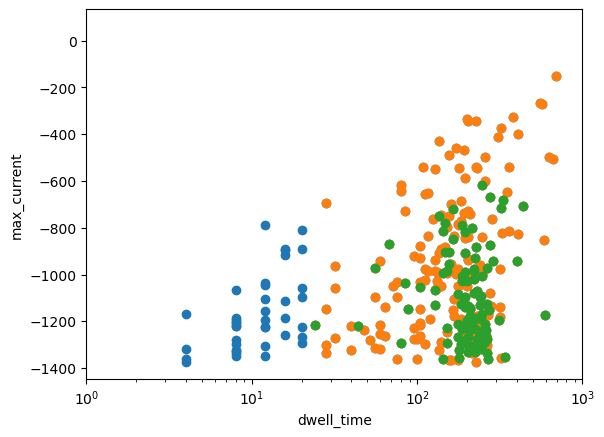

In [12]:
plot_scatter(filter_widget.value, default_filter=default_filter_widget.value)

# Event Plot

In [7]:
def plot(event_csv, use_model):
    if use_model:
        plot_opt_event(event_csv, Kmax=Kmax.value)
    else:
        plot_event(event_csv)
        
interact(plot, event_csv = filter_events(lambda events_path: default_filter_widget.value(events_path) and filter_widget.value(events_path), event_list(events_path.value)), use_model=True)

Filtering:   0%|          | 0/399 [00:00<?, ?it/s]

159/399: 39%


interactive(children=(Dropdown(description='event_csv', options=(PosixPath('output/events/event_00001655.csv')…

<function __main__.plot(event_csv, use_model)>